In [1]:
import numpy as np
import viscofit as vf

# Load .IBW Files

In [2]:
###### THIS IS PLACE HOLDER, MUST LOAD AFM DATA
times = [np.linspace(0, 1, 1000) for i in range(3)]
indentations = [(i + 1) * 100e-9 * t / max(t) for i, t in enumerate(times)]
radii = [(i + 1) * 50e-9 for i in range(len(times))]
forces = [vf.forceMaxwell_LeeRadok(np.array([1e5, 1e6, 1e-3]), t, h, r) for t, h, r in zip(times, indentations, radii)]

# Fit Standard Models

### ----------------
### Maxwell Fit
### ----------------

### maxwellModel(forces, times, indentations, radii, E_logbounds=(1, 9), T_logbounds=(-5, 0)

##### initializes an instance of the maxwellModel class used for generating fits, of experimentally obtained force-distance data all belonging to the same sample, to a maxwell model which corresponds to the sample's viscoelastic behavior
##### :param forces: either list of numpy arrays or single numpy array corresponding to the force signals from an AFM
##### :param times: either list of numpy arrays or single numpy array corresponding to the time signals from an AFM
##### :param indentations: either list of numpy arrays or single numpy array corresponding to the indentation signals from an AFM
##### :param radii: either list of floats or single float corresponding to the tip radii of an AFM
##### :param E_logbounds: tuple (float, float) high and low log bound for the elastic elements in the model
##### :param T_logbounds: tuple (float, float) high and low log bound for the time constants in the model

In [3]:
# create a maxwellModel instance
# load the AFM forces, times, indentations, and radii
# define the logbounds for E to be between 4 and 7 -> (10^4, 10^7)
# define the logbounds for T to be between -4 and -2 -> (10^-4, 10^-2)
model1 = vf.maxwellModel(forces=forces, times=times, indentations=indentations, 
                         radii=radii, E_logbounds=(4, 7), T_logbounds=(-4, -2))

### maxwellModel.fit(maxiter=1000, max_model_size=4, fit_sequential=True, num_attempts=5)

##### fit experimental force distance curve(s) to maxwell model of arbitrary size using a nelder-mead simplex which typically gives good fits rather quickly
##### :param maxiter: int maximum iterations to perform for each fitting attempt (larger number gives longer run time)
##### :param max_model_size: int largest number of arms per maxwell model to test (going larger tends to give poor and unphysical fits)
##### :param fit_sequential: bool whether or not to fit sequentially (cascade fit from previous model as the initial guess of the next) (RECOMMENDED)
##### :param num_attempts: int number of fitting attempts to make per fit, larger number will give more statistically significant results, but will take longer
##### :return: dict {best_fit, (numpy array of final best fit params), final_cost, (float of final cost for the best fit params), time, (float of time taken to generate best fit)}

In [4]:
# fit the maxwellModel instance to the experimental data using Nelder-Mead
# at most, perform 1000 iterations per fit attempt
# the largest possible model will have 3 arms
# the model will be fit sequentially, starting with a 1 arm, then using the best 1 arm parameters as an initial guess
# for the 2 arm model, and the best 2 arm model for the 3 arm model
# perform 10 fit attempts per model
model1.fit(maxiter=1000, max_model_size=3, fit_sequential=True, num_attempts=10)

{'final_params': array([1.54477968e+05, 8.48085713e+05, 8.37937090e-04, 6.03752940e+04,
        1.21614486e-03, 3.70607658e+04, 5.22429507e-03]),
 'final_cost': 4.219326239585761e-21,
 'time': 8.0644211769104,
 'trial_variance': 5.795036724099341e-26}

### maxwellModel.fit_slow(maxiter=1000, max_model_size=4, fit_sequential=True, num_attempts=5)

##### fit experimental force distance curve(s) to maxwell model of arbitrary size using simulated annealing with a nelder-mead simplex local search, this is very computationally costly and will take a very long time though typically results in much better fits

##### :param maxiter: int maximum iterations to perform for each fitting attempt (larger number gives longer run time)
##### :param max_model_size: int largest number of arms per maxwell model to test (going larger tends to give poor and unphysical fits)
##### :param fit_sequential: bool whether or not to fit sequentially (cascade fit from previous model as the initial guess of the next) (RECOMMENDED)
##### :param num_attempts: int number of fitting attempts to make per fit, larger number will give more statistically significant results, but will take longer
##### :return: dict {best_fit, (numpy array of final best fit params), final_cost, (float of final cost for the best fit params), time, (float of time taken to generate best fit)}

In [5]:
# fit the maxwellModel instance to the experimental data using Simulated Annealing with a Nelder-Mead local search
# at most, perform 500 iterations per fit attempt
# the largest possible model will have 3 arms
# the model will not be fit sequentially, fitting all the parameters at once
# perform 7 fit attempts per model
model1.fit_slow(maxiter=500, max_model_size=3, fit_sequential=False, num_attempts=7)

{'final_params': array([4.33040679e+04, 1.50822988e+04, 1.40303185e-03, 1.04161568e+06,
        1.14461170e-03]),
 'final_cost': 2.0407387918323205e-19,
 'time': 30.40364909172058,
 'trial_variance': 4.069137729537026e-26}

### ----------------
### Kelvin-Voigt Fit
### ----------------

### kelvinVoigtModel(forces, times, indentations, radii, J_logbounds=(-9, -1), T_logbounds=(-5, 0))

##### initializes an instance of the kelvinVoigtModel class used for generating fits, of experimentally obtained force-distance data all belonging to the same sample, to a kelvin-voigt model which corresponds to the sample's viscoelastic behavior
##### :param forces: either list of numpy arrays or single numpy array corresponding to the force signals from an AFM
##### :param times: either list of numpy arrays or single numpy array corresponding to the time signals from an AFM
##### :param indentations: either list of numpy arrays or single numpy array corresponding to the indentation signals from an AFM
##### :param radii: either list of floats or single float corresponding to the tip radii of an AFM
##### :param J_logbounds: tuple (float, float) high and low log bound for the compliance elements in the model
##### :param T_logbounds: tuple (float, float) high and low log bound for the time constants in the model

In [6]:
# create a kelvinVoigtModel instance
# load the AFM forces, times, indentations, and radii
# define the logbounds for J to be between -10 and -5 -> (10^-10, 10^-5)
# define the logbounds for T to be between -5 and -3 -> (10^-5, 10^-3)
model2 = vf.kelvinVoigtModel(forces=forces, times=times, indentations=indentations, 
                             radii=radii, J_logbounds=(-10, -5), T_logbounds=(-5, -3))

### kelvinVoigtModel.fit(maxiter=1000, max_model_size=4, fit_sequential=True, num_attempts=5)

##### fit experimental force distance curve(s) to kelvin-voigt model of arbitrary size using a nelder-mead simplex which typically gives good fits rather quickly
##### :param maxiter: int maximum iterations to perform for each fitting attempt (larger number gives longer run time)
##### :param max_model_size: int largest number of arms per maxwell model to test (going larger tends to give poor and unphysical fits)
##### :param fit_sequential: bool whether or not to fit sequentially (cascade fit from previous model as the initial guess of the next) (RECOMMENDED)
##### :param num_attempts: int number of fitting attempts to make per fit, larger number will give more statistically significant results, but will take longer
##### :return: dict {best_fit, (numpy array of final best fit params), final_cost, (float of final cost for the best fit params), time, (float of time taken to generate best fit)}

In [7]:
# fit the kelvinVoigtModel instance to the experimental data using Nelder-Mead
# at most, perform 1250 iterations per fit attempt
# the largest possible model will have 2 arms
# the model will be fit sequentially, starting with a 1 arm, then using the best 1 arm parameters as an initial guess
# for the 2 arm model, and the best 2 arm model for the 3 arm model
# perform 6 fit attempts per model
model2.fit(maxiter=1250, max_model_size=2, fit_sequential=True, num_attempts=6)

{'final_params': array([1.00000000e-10, 1.00189408e-10, 2.80294386e-04]),
 'final_cost': 2.6191285959191242e-15,
 'time': 4.150892734527588,
 'trial_variance': 7.951320361018465e-32}

### kelvinVoigtModel.fit_slow(maxiter=1000, max_model_size=4, fit_sequential=True, num_attempts=5)

##### fit experimental force distance curve(s) to kelvin-voigt model of arbitrary size using simulated annealing with a nelder-mead simplex local search, this is very computationally costly and will take a very long time though typically results in much better fits
##### :param maxiter: int maximum iterations to perform for each fitting attempt (larger number gives longer run time)
##### :param max_model_size: int largest number of arms per maxwell model to test (going larger tends to give poor and unphysical fits)
##### :param fit_sequential: bool whether or not to fit sequentially (cascade fit from previous model as the initial guess of the next) (RECOMMENDED)
##### :param num_attempts: int number of fitting attempts to make per fit, larger number will give more statistically significant results, but will take longer
##### :return: dict {best_fit, (numpy array of final best fit params), final_cost, (float of final cost for the best fit params), time, (float of time taken to generate best fit)}

In [8]:
# fit the kelvinVoigtModel instance to the experimental data using Simulated Annealing with a Nelder-Mead local search
# at most, perform 100 iterations per fit attempt
# the largest possible model will have 5 arms
# the model will not be fit sequentially, fitting all the parameters at once
# perform 3 fit attempts per model
model2.fit_slow(maxiter=100, max_model_size=5, fit_sequential=False, num_attempts=3)

{'final_params': array([7.14803949e-10, 1.18980335e-08, 3.70806849e-04]),
 'final_cost': 2.0331718638029487e-13,
 'time': 1.1828334331512451,
 'trial_variance': 7.782956648694472e-19}

### ----------------
### Power Law Fit
### ----------------

### powerLawModel(forces, times, indentations, radii, E0_logbounds=(1, 9), a_logbounds=(-5, 0))

##### initializes an instance of the customModel class used for generating fits, of experimentally obtained force-distance data all belonging to the same sample, to a power law rheology model which corresponds to the sample's viscoelastic behavior
##### :param forces: either list of numpy arrays or single numpy array corresponding to the force signals from an AFM
##### :param times: either list of numpy arrays or single numpy array corresponding to the time signals from an AFM
##### :param indentations: either list of numpy arrays or single numpy array corresponding to the indentation signals from an AFM
##### :param radii: either list of floats or single float corresponding to the tip radii of an AFM
##### :param E0_logbounds: tuple (float, float) high and low log bound for the compliance elements in the model
##### :param a_logbounds: tuple (float, float) high and low log bound for the time constants in the model

In [9]:
# create a powerLawModel instance
# load the AFM forces, times, indentations, and radii
# define the logbounds for E0 to be between 1 and 11 -> (10^1, 10^11)
# define the logbounds for a to be between -5 and 1 -> (10^-5, 10^1)
model3 = vf.powerLawModel(forces=forces, times=times, indentations=indentations, 
                          radii=radii, E0_logbounds=(1, 11), a_logbounds=(-5, 1))

### powerLawModel.fit(maxiter=1000, num_attempts=5)

##### fit experimental force distance curve(s) to power law rheology model using a nelder-mead simplex which typically gives good fits rather quickly
##### :param maxiter: int maximum iterations to perform for each fitting attempt (larger number gives longer run time)
##### :param num_attempts: int number of fitting attempts to make per fit, larger number will give more statistically significant results, but will take longer
##### :return: dict {best_fit, (numpy array of final best fit params), final_cost, (float of final cost for the best fit params), time, (float of time taken to generate best fit)}

In [10]:
# fit the powerLawModel instance to the experimental data using Nelder-Mead
# at most, perform 2000 iterations per fit attempt
# perform 9 fit attempts per model
model3.fit(maxiter=2000, num_attempts=9)

{'final_params': array([3.50811979e+08, 1.00000000e-05]),
 'final_cost': 1.7989097700117333e-07,
 'time': 6.8477067947387695,
 'trial_variance': 2.3707288086815015e-39}

### powerLawModel.fit_slow(maxiter=1000, num_attempts=5)

##### fit experimental force distance curve(s) to power law rheology model using simulated annealing with a nelder-mead simplex local search, this is very computationally costly and will take a very long time though typically results in much better fits
##### :param maxiter: int maximum iterations to perform for each fitting attempt (larger number gives longer run time)
##### :param num_attempts: int number of fitting attempts to make per fit, larger number will give more statistically significant results, but will take longer
##### :return: dict {best_fit, (numpy array of final best fit params), final_cost, (float of final cost for the best fit params), time, (float of time taken to generate best fit)}

In [11]:
# fit the powerLawModel instance to the experimental data using Simulated Annealing with a Nelder-Mead local search
# at most, perform 500 iterations per fit attempt
# perform 4 fit attempts per model
model3.fit_slow(maxiter=500, num_attempts=4)

{'final_params': array([3.50811978e+08, 1.00000000e-05]),
 'final_cost': 1.798909770011743e-07,
 'time': 5.776541233062744,
 'trial_variance': 7.193380293082244e-22}

# --------------------------------------
# Fit Custom Defined Models
# --------------------------------------

### Define your own function to be fit to the experimental data

### customModel(forces, times, indentations, radi)

##### initializes an instance of the customModel class used for generating fits, of experimentally obtained force-distance data all belonging to the same sample, to a custom defined rheology model which corresponds to the sample's viscoelastic behavior
##### :param forces: either list of numpy arrays or single numpy array corresponding to the force signals from an AFM
##### :param times: either list of numpy arrays or single numpy array corresponding to the time signals from an AFM
##### :param indentations: either list of numpy arrays or single numpy array corresponding to the indentation signals from an AFM
##### :param radii: either list of floats or single float corresponding to the tip radii of an AFM

In [12]:
# create a customModel instance
# load the AFM forces, times, indentations, and radii
model4 = vf.customModel(forces=forces, times=times, indentations=indentations, radii=radii)

### customModel.fit(function, training_data, bounds, maxiter=1000, num_attempts=5)

##### fit experimental observable of your choice to a custom model for the observable using a nelder-mead simplex which typically gives good fits rather quickly
##### :param function: function for the desired observable to be predicted
##### :param training_data: either numpy array or list of numpy arrays the experimental data to be replicated by the function being trained
##### :param bounds: (n, 2) numpy array of upper and lower bounds: [[lower1, upper1], ... [lowerN, upperN]]
##### :param maxiter: int maximum iterations to perform for each fitting attempt (larger number gives longer run time)
##### :param num_attempts: int number of fitting attempts to make per fit, larger number will give more statistically significant results, but will take longer
##### :return: dict {best_fit, (numpy array of final best fit params), final_cost, (float of final cost for the best fit params), time, (float of time taken to generate best fit)}

In [13]:
# define the custom function that the customModel class will fit
# in this case, we want to fit a function to predict force, given the radius and indentation signal as well as a
# set of parameters

def custom_force_func(params):
    # VERY IMPORTANT NOTES: 
    # the function MUST take in parameters as an argument and MUST output a single vector observable (i.e. force here)
    # the observables (in this case radius and indentation) MUST come from the observables in the model 
    # possible obeservables to use in creating custom functions: (model4.radii, model4.indentation, model4.force, model4.dts)
    # F( t ) = R * p1 * h( t )^p2
    return model4.radii * params[0] * model4.indentation ** params[1]

In [14]:
# define the bounds
# in the case of the function that we made above: params is a (2, ) numpy array: array([p1, p2])
# thus, the bounds must be in the following form:
# array([[p1 lower bounds, p1 upper bounds], 
#        [p2 lower bounds, p2 upper bounds]])

bounds = np.array([[1, 100], [0, 10]])

In [15]:
# fit the customModel instance to the experimental data using Nelder-Mead
# define the function to fit as the custom_force_func that we made above
# define the training data as the force signal in model4 (we will fit the funciton to this data)
# at most, perform 2000 iterations per fit attempt
# perform 9 fit attempts per model
model4.fit(function=custom_force_func, training_data=model4.force, bounds=bounds, maxiter=2000, num_attempts=9)

{'final_params': array([1.00000000e+02, 5.00387264e-19]),
 'final_cost': 3.1209122964812775e-06,
 'time': 0.734046220779419,
 'trial_variance': 3.15504898239659e-13}

### customModel.fit_slow(function, training_data, bounds, maxiter=1000, num_attempts=5)
        
##### fit experimental observable of your choice to a custom model for the observable using simulated annealing with a nelder-mead simplex local search, this is very computationally costly and will take a very long time though typically results in much better fits
##### :param function: function for the desired observable to be predicted
##### :param training_data: either numpy array or list of numpy arrays the experimental data to be replicated by the function being trained
##### :param bounds: (n, 2) numpy array of upper and lower bounds: [[lower1, upper1], ... [lowerN, upperN]]
##### :param maxiter: int maximum iterations to perform for each fitting attempt (larger number gives longer run time)
##### :param num_attempts: int number of fitting attempts to make per fit, larger number will give more statistically significant results, but will take longer
##### :return: dict {best_fit, (numpy array of final best fit params), final_cost, (float of final cost for the best fit params), time, (float of time taken to generate best fit)}

In [16]:
# fit the powerLawModel instance to the experimental data using Simulated Annealing with a Nelder-Mead local search
# define the function to fit as the custom_force_func that we made above
# define the training data as the force signal in model4 (we will fit the funciton to this data)
# at most, perform 1000 iterations per fit attempt
# perform 4 fit attempts per model
model4.fit_slow(function=custom_force_func, training_data=model4.force, bounds=bounds, maxiter=1000, num_attempts=4)

{'final_params': array([9.99998194e+01, 4.32750776e-08]),
 'final_cost': 3.1209147495911757e-06,
 'time': 2.4644052982330322,
 'trial_variance': 3.2658385256935185e-15}

# Generate Maps

In [17]:
surface_scan_FD_data = np.array([[forces[0], times[0], indentations[0], radii[0]] for i in range(25)], dtype='object')
scan_data = []
for i, scan in enumerate(surface_scan_FD_data):
    print(100 * i / len(surface_scan_FD_data), end='\r')
    model = vf.maxwellModel(scan[0], scan[1], scan[2], scan[3], E_logbounds=(4, 8), T_logbounds=(-4, -2))
    scan_data.append(model.fit()['final_params'])

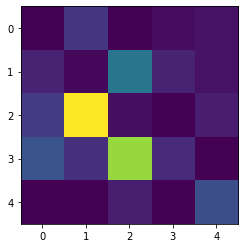

In [19]:
glassy_moduli = np.array([sum(scan[0] + scan[1::2]) for scan in scan_data]).reshape(5, 5)
import matplotlib.pyplot as plt
plt.imshow(glassy_moduli)

In [20]:
glassy_moduli

array([[1100000.        , 1446835.86746891, 1099999.99973938,
        1172573.62959897, 1204994.26084219],
       [1319573.73170599, 1149222.76587801, 1956221.84009414,
        1321863.59432642, 1203495.5141261 ],
       [1479683.21805208, 3303407.00099939, 1177682.5040746 ,
        1100000.        , 1276137.5561216 ],
       [1673328.50227645, 1408896.86227694, 2963549.49976849,
        1369955.22463789, 1099999.99999769],
       [1100003.33911183, 1100002.51821685, 1282530.08001054,
        1100000.03866754, 1631310.25374126]])